# House Price Prediction

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv('USA Housing Dataset.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 0:00,376000.0,3,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 0:00,800000.0,4,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 0:00,2238888.0,5,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 0:00,324000.0,3,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 0:00,549900.0,5,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   int64  
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

#### Check for missing values and duplicate rows

In [22]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [23]:
df.duplicated().sum()

0

#### Drop rows with no price value

In [3]:
(df['price'] == 0).sum()

49

In [4]:
df = df[df['price'] > 0]

## Exploratory Data Analysis

In [5]:
sns.set_theme(style='darkgrid')

In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4091.0,559687.194323,584006.025022,7800.0,325093.75,464600.00,660000.0,26590000.00
bedrooms,4091.0,3.393547,0.899115,0.0,3.00,3.00,4.0,8.00
bathrooms,4091.0,2.156624,0.776501,0.0,1.75,2.25,2.5,6.75
sqft_living,4091.0,2135.931313,949.318839,370.0,1460.00,1980.00,2610.0,10040.00
sqft_lot,4091.0,14676.609631,35965.265793,638.0,5000.00,7665.00,10952.5,1074218.00
floors,4091.0,1.514300,0.535172,1.0,1.00,1.50,2.0,3.50
waterfront,4091.0,0.006844,0.082457,0.0,0.00,0.00,0.0,1.00
view,4091.0,0.240039,0.776533,0.0,0.00,0.00,0.0,4.00
condition,4091.0,3.449768,0.676252,1.0,3.00,3.00,4.0,5.00
sqft_above,4091.0,1825.789538,852.802465,370.0,1190.00,1600.00,2303.0,7680.00


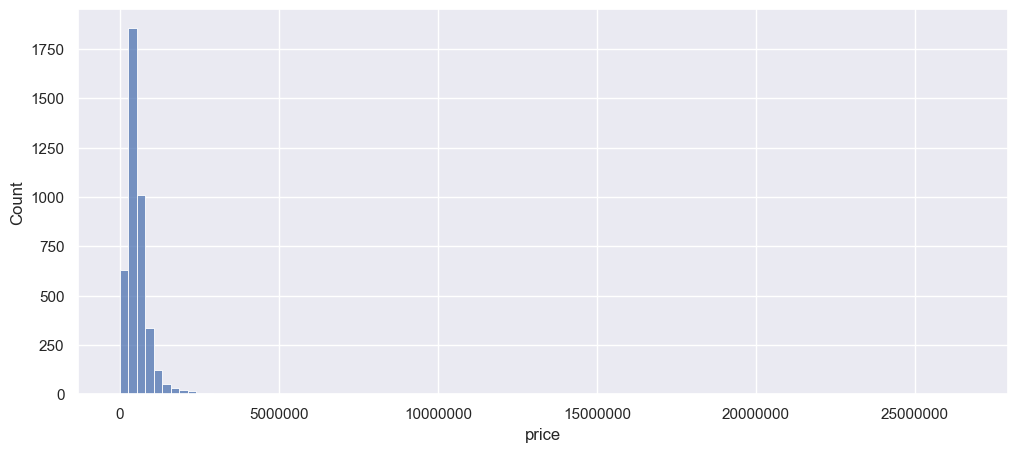

In [6]:
# distribution of house prices
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='price', bins=100)
plt.ticklabel_format(style='plain')

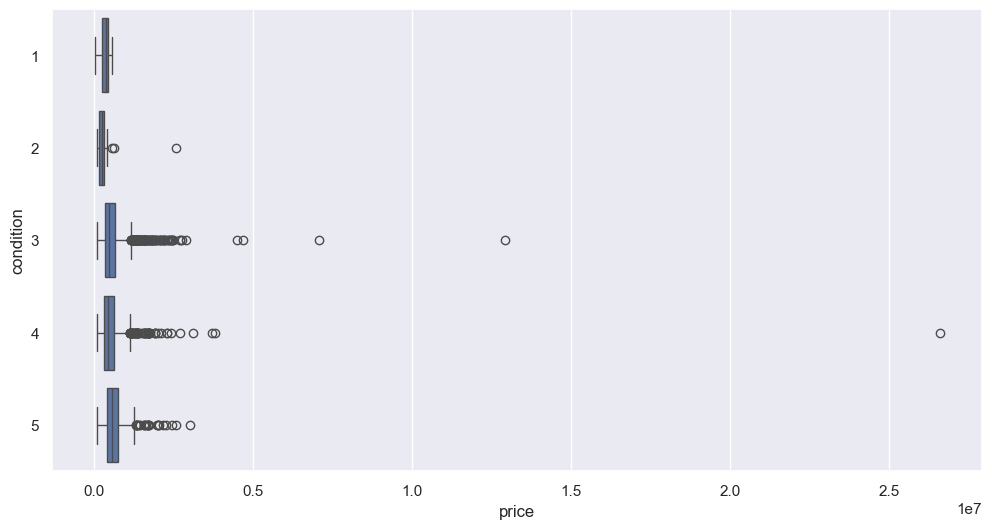

In [7]:
# Properties in better condition should typically be worth more
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='condition', orient='h', width=0.8);

### Correlation

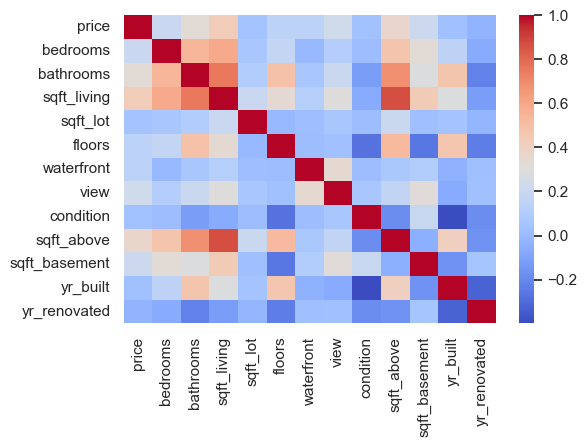

In [93]:
# The features most strongly correlated with the price are sqft_living, sqft_above (amount of living space excluding the basement), and bathrooms
# The condition of the property would be expected to have a greater effect on the price, but has a weak correlation with the house price
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm');

In [65]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.434733
sqft_above       0.369140
bathrooms        0.332749
view             0.232152
sqft_basement    0.211917
bedrooms         0.199341
waterfront       0.146449
floors           0.144451
sqft_lot         0.046936
condition        0.034530
yr_built         0.027002
yr_renovated    -0.028544
Name: price, dtype: float64

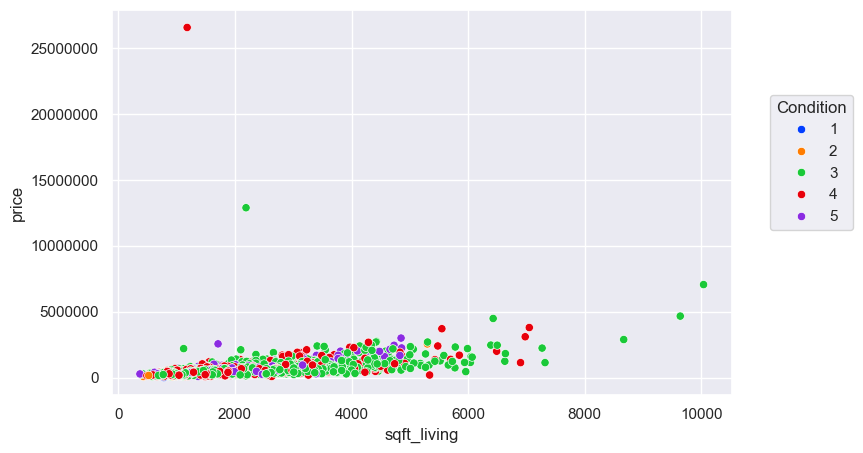

In [8]:
# house prices based on amount of living space and condition of the property
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='condition', palette='bright')
plt.ticklabel_format(style='plain')
plt.legend(title='Condition', bbox_to_anchor=(1.05,0.8), loc=2);

### Outliers

There are two points that are extreme outliers in the scatter plot above, as most other data points are 5 million or lower. Data points that are outside the range of 3 standard deviations above/below the mean will be considered outliers.

In [9]:
# using values from df.describe()
upper_boundary = 553062.877289 + 3 * 583686.452244
upper_boundary

2304122.234021

There is one row in the dataset with a price of $7800, which could be considered a potential outlier. However, based on the amount of living space, the lower property value would be more reasonable as this is a similar size to an apartment.

In [10]:
df[df['price'] == 7800]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3891,2014-05-06 0:00,7800.0,2,1.0,780,16344,1.0,0,0,1,780,0,1942,0,4229 S 144th St,Tukwila,WA 98168,USA


In [11]:
# remove outliers
df = df[df['price'] < upper_boundary]

### Distribution of House Prices After Removing Outliers

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4065.0,535654.491425,309476.248678,7800.0,325000.00,461000.00,657500.0,2300000.0
bedrooms,4065.0,3.387700,0.896321,0.0,3.00,3.00,4.0,8.0
bathrooms,4065.0,2.145633,0.760634,0.0,1.75,2.25,2.5,6.5
sqft_living,4065.0,2115.805658,902.809860,370.0,1460.00,1970.00,2600.0,7320.0
sqft_lot,4065.0,14650.695449,36063.639869,638.0,5000.00,7636.00,10860.0,1074218.0
floors,4065.0,1.512546,0.535033,1.0,1.00,1.50,2.0,3.5
waterfront,4065.0,0.005412,0.073376,0.0,0.00,0.00,0.0,1.0
view,4065.0,0.230750,0.760031,0.0,0.00,0.00,0.0,4.0
condition,4065.0,3.449938,0.675802,1.0,3.00,3.00,4.0,5.0
sqft_above,4065.0,1811.938499,828.958721,370.0,1190.00,1590.00,2300.0,7320.0


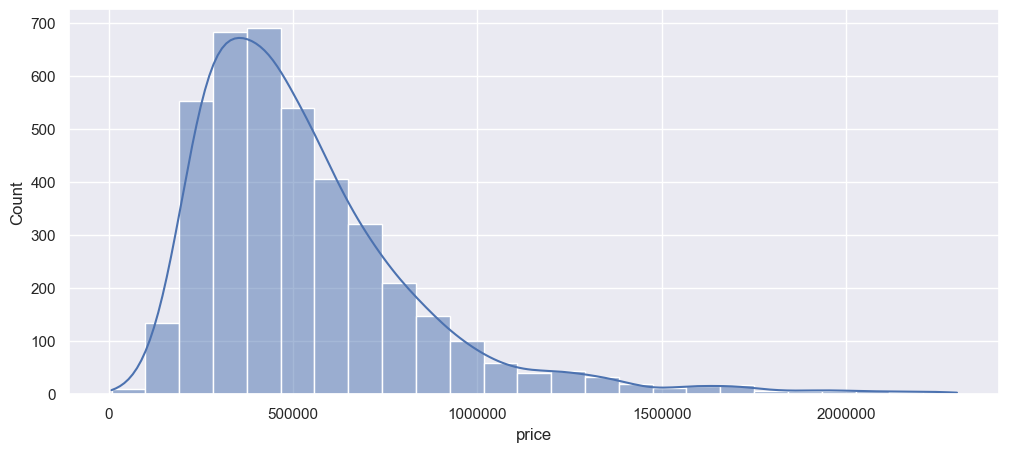

In [13]:
# right-skewed distribution
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='price', bins=25, kde=True)
plt.ticklabel_format(style='plain')

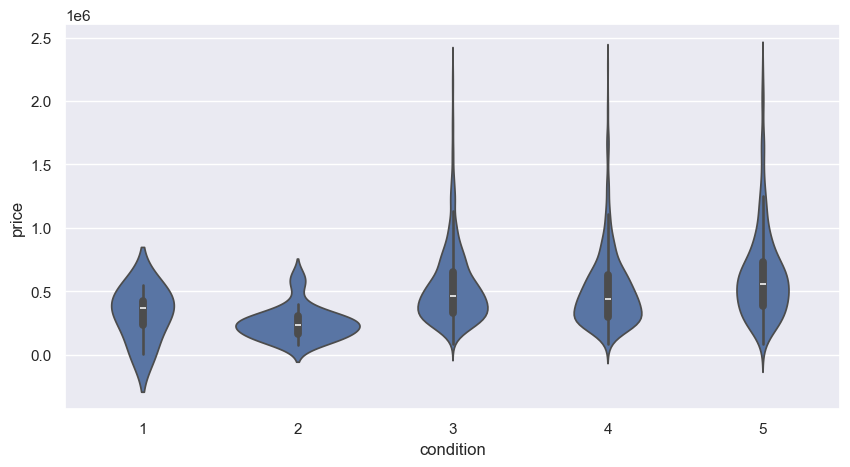

In [14]:
# houses with a condition of 3 or more have a much wider distribution
# however, most data points are concentrated around the median
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='condition', y='price', width=0.8);

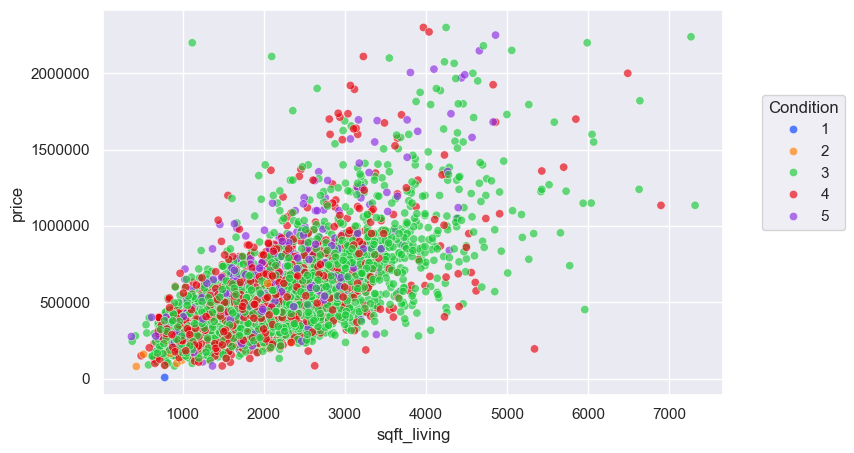

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='condition', palette='bright', alpha=0.65)
plt.ticklabel_format(style='plain')
plt.legend(title='Condition', bbox_to_anchor=(1.05,0.8), loc=2);

In [17]:
df.to_csv('USA Housing Dataset Outliers Removed.csv', index=False)